# Self Organizing Maps

In [96]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from unicodedata import normalize
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [97]:
def accent_remover(x):
    try:
        float(x)
        return x
    except:
        return normalize('NFKD',x).encode('ASCII', 'ignore').decode('ASCII')

In [98]:
# Importing the dataset
# http://archive.ics.uci.edu/ml/datasets/statlog+(australian+credit+approval)
dataset = pd.read_csv('datatran2017.csv', sep=',', encoding='ISO-8859-1').dropna().drop_duplicates()
dataset = dataset.transform([accent_remover])

X = dataset.iloc[:, 12:18].values
y = dataset.iloc[:, 22].values
dataset.head(15)
# dataset.iloc[:, 1:-1]

/home/maiconmares/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (1,2,3,4,7,8,9,10,11,12,13,14,15,16,17,28,29,30,31,32,33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos,veiculos,latitude,longitude,regional,delegacia,uop,Unnamed: 31,Unnamed: 32,Unnamed: 33
,accent_remover,accent_remover,accent_remover,accent_remover,accent_remover,accent_remover,accent_remover,accent_remover,accent_remover,accent_remover,...,accent_remover,accent_remover,accent_remover,accent_remover,accent_remover,accent_remover,accent_remover,accent_remover,accent_remover,accent_remover
2,11.0,2017-01-01,domingo,00:00:00,PR,153.0,56.0,9,SANTO ANTONIO DA PLATINA,Animais na Pista,...,0.0,2.0,1.0,-23.0,36951985,309,93513107,SR-PR,DEL7/7,UOP07/PR
4,13.0,2017-01-01,domingo,00:00:00,SC,280.0,77.0,3,CORUPA,Ingestao de Alcool,...,0.0,1.0,1.0,-26.0,44675249,-49,20166969,SR-SC,DEL8/6,UOP03/SC
6,15.0,2017-01-01,domingo,00:01:00,PB,104.0,3.0,4,NOVA FLORESTA,Ingestao de Alcool,...,0.0,0.0,1.0,-6.0,4622,-36,1899,SR-PB,DEL14/2,UOP04/PB
8,17.0,2017-01-01,domingo,01:45:00,RS,116.0,34.0,9,VACARIA,Defeito Mecanico no Veiculo,...,0.0,4.0,2.0,-28.0,5071196,-50,941176,SR-RS,DEL9/5,UOP03/RS
12,21.0,2017-01-01,domingo,00:00:00,PI,316.0,41.0,8,LAGOA DO PIAUI,Velocidade Incompativel,...,2.0,1.0,1.0,-5.0,43086608,-42,6358987,SR-PI,DEL17/1,UOP02/PI
13,22.0,2017-01-01,domingo,01:15:00,CE,20.0,423.0,6,FORTALEZA,Animais na Pista,...,0.0,2.0,1.0,-3.0,7318616,-38,5266704,SR-CE,DEL16/1,UOP02/CE
14,23.0,2017-01-01,domingo,01:38:00,SC,101.0,189.0,6,BIGUACU,Velocidade Incompativel,...,0.0,1.0,1.0,-27.0,46422502,-48,64184184,SR-SC,DEL8/1,UOP01/SC
16,25.0,2017-01-01,domingo,00:30:00,MS,262.0,34.0,5,TRES LAGOAS,Animais na Pista,...,0.0,0.0,1.0,-20.0,78594796,-51,92953072,SR-MS,DEL3/7,UOP01/MS
19,30.0,2017-01-01,domingo,02:20:00,SP,153.0,63.0,3,SAO JOSE DO RIO PRETO,Ingestao de Alcool,...,0.0,0.0,2.0,-20.0,82376296,-49,35789764,SR-SP,DEL6/9,UOP01/SP


In [99]:
# Converte os dados de string para number gerando as categorias
encoder = LabelEncoder()
X[:,0] = encoder.fit_transform(X[:,0])
X[:,1] = encoder.fit_transform(X[:,1])
X[:,2] = encoder.fit_transform(X[:,2])
X[:,3] = encoder.fit_transform(X[:,3])
X[:,4] = encoder.fit_transform(X[:,4])
X[:,5] = encoder.fit_transform(X[:,5])


In [100]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)
X = np.array(X)
print(np.shape(X))
print(np.shape(y))

(44782, 6)
(44782,)


In [101]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 6, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

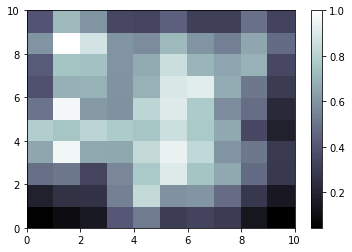

In [102]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
show()

IndexError: list index out of range

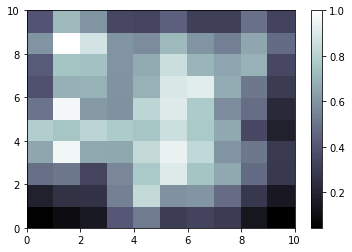

In [103]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors  = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()